In [145]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math

read data 

In [3]:
prices=pd.read_csv("data/raw/GasPrices/2020/01/2020-01-01-prices.csv")
stations=pd.read_csv("data/stations.csv")

set range for lattitude

In [4]:
minlat=53.567181
maxlat=53.648408

In [5]:
minlon=9.876232
maxlon=9.941601

In [6]:
#(stations.city=="Hamburg")& - 26 
# wo 51 
stations_on_route=stations.loc[
             (stations.latitude>minlat)&(stations.latitude<maxlat)&
            (stations.longitude>minlon)&(stations.longitude<maxlon)]
   

In [7]:
#len 723
selected_prices = prices.loc[prices.station_uuid.isin(stations_on_route.uuid)]

In [8]:
#clean no warning version!
#selected_prices.loc[:,'station_name'] = selected_prices['station_uuid'].map(name_dict) 

extend station id to meaningful info

In [9]:
selected_prices.loc[:,'station_name']=selected_prices.station_uuid.map(stations_on_route.set_index('uuid')['brand'].to_dict())
selected_prices.loc[:,'station_address']=selected_prices.station_uuid.map(stations_on_route.set_index('uuid')['street'].to_dict())
selected_prices.loc[:,'station_latitude']=selected_prices.station_uuid.map(stations_on_route.set_index('uuid')['latitude'].to_dict())
selected_prices.loc[:,'station_longitude']=selected_prices.station_uuid.map(stations_on_route.set_index('uuid')['longitude'].to_dict())



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [10]:
selected_prices.loc[:,'station_name']=selected_prices.station_uuid

In [11]:
selected_prices.to_csv("data/processed/2020/01/2020-01-01-prices.csv")

In [12]:
from datetime import datetime

datetime_object = datetime.strptime('2020-01-01 04:02:03+01', '%Y-%m-%d %H:%M:%S+01')
#selected_prices.date
#= pd.to_datetime(selected_prices.date, format='%Y-%m-%d %H:%M:%S+1')
print(datetime_object)

2020-01-01 04:02:03


In [13]:
def dt_conv(l_d):
    for i in l_d:
        datetime_object = datetime.strptime(i, '%Y-%m-%d %H:%M:%S+01')
        print(datetime_object)

In [14]:
selected_prices.head()

,date,station_uuid,diesel,e5,e10,dieselchange,e5change,e10change,station_name,station_address,station_latitude,station_longitude
1268,2020-01-01 04:37:04+01,51d4b4dc-a095-1aa0-e100-80009459e03a,1.319,1.469,1.449,1,1,1,51d4b4dc-a095-1aa0-e100-80009459e03a,KIELER STRASSE 234,53.57904,9.936400
3833,2020-01-01 05:02:04+01,95b23160-eeb2-440f-adc4-245238f24e42,1.419,1.559,1.539,1,1,1,95b23160-eeb2-440f-adc4-245238f24e42,Holsteiner Chaussee,53.61471,9.906061
4195,2020-01-01 05:02:04+01,5336de21-fd2d-4821-b4fe-bf89684cdb81,1.389,1.529,1.509,1,1,1,5336de21-fd2d-4821-b4fe-bf89684cdb81,Pinneberger Straße,53.63288,9.910497
4864,2020-01-01 05:02:04+01,6d7517d5-2a6c-403f-bd19-f9557c5ff16c,1.419,1.559,1.539,1,1,1,6d7517d5-2a6c-403f-bd19-f9557c5ff16c,Kieler Straße,53.59994,9.917373
5499,2020-01-01 05:04:04+01,b282ef61-a88d-4abd-bfba-92524f78867e,1.419,1.559,1.539,1,1,1,b282ef61-a88d-4abd-bfba-92524f78867e,Schleswiger Damm,53.64182,9.916311


In [15]:
df=selected_prices.loc[selected_prices.station_uuid=="95b23160-eeb2-440f-adc4-245238f24e42"]
#plot(figsize = (12,6))

In [16]:
df.loc[:,'date']=pd.to_datetime(df['date'])

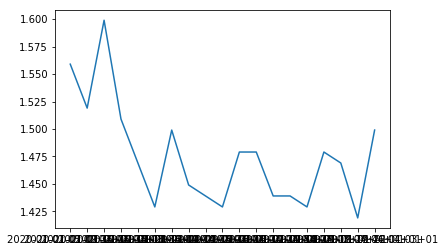

In [17]:

i="95b23160-eeb2-440f-adc4-245238f24e42"    
df = selected_prices.loc[selected_prices.station_uuid==i]
df1 = df.sort_values('date', ascending=True)
plt.plot(df1['date'], df1['e5'],label=df1['station_name'].values[0]+df1['station_address'].values[0])

#plt.xticks(rotation='vertical')
#plt.legend(loc="lower left")

In [18]:
pricesproc=pd.read_csv("data/processed/2020/01/2020-01-01-prices.csv")


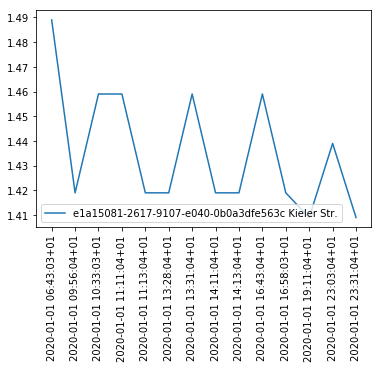

In [19]:
df=pricesproc.loc[pricesproc.station_uuid=="e1a15081-2617-9107-e040-0b0a3dfe563c"]
df1= df.sort_values('date', ascending=True)
plt.plot(df['date'], df['e5'],label=df['station_name'].values[0]+" "+df['station_address'].values[0])
plt.xticks(rotation='vertical')
plt.legend(loc="lower left")

In [20]:
def loop_days(beg, end):
    days_list=[]
    for i in range(beg,end+1):
        if i<10:
            days_list.append("0"+str(i))
        elif i>9 and i<32:
            days_list.append(str(i))
        else:
            print("smth went wrong")
            return 0
    return days_list

In [21]:
data_dir = 'data/processed/2020/01'
merged_data = pd.DataFrame()
spec_id = "e1a15081-2617-9107-e040-0b0a3dfe563c"

for filename in os.listdir(data_dir):
    if "csv" in filename:
        #print(filename)
        dataset=pd.read_csv(os.path.join(data_dir, filename))
        #print("all ",len(dataset))
        dataset_spec=dataset.loc[dataset.station_uuid==spec_id]
        #print("sel ",len(dataset_spec))
        merged_data = merged_data.append(dataset_spec)



In [22]:
#merged_data.loc[:,'date']=pd.DatetimeIndex(merged_data['date'])
merged_data.loc[:,'date']=pd.to_datetime(merged_data['date'])

In [23]:
merged_data.sort_values('date', ascending=True, inplace=True)

In [24]:
merged_data.date.values[0].item()

1577857383000000000

In [25]:
import matplotlib.dates as mdates


def plot_over_time_1(data,to_save=False,name='',gas_type='e5'):

    df1= data.sort_values('date', ascending=True)
    fig, ax = plt.subplots()
    #ax.plot('date', 'adj_close', data=data)
    label=gas_type#+"@"+df1['station_name'].values[0]+" "+df1['station_address'].values[0]
    #ax.plot(pd.to_datetime(df1['date']), df1[gas_type])
    ax.plot(df1['date'], df1[gas_type])
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
    ax.grid(True)
    fig.autofmt_xdate()
    if to_save:
        plt.savefig("Plots/"+name+".png", transparent=True)
    plt.show()
    

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


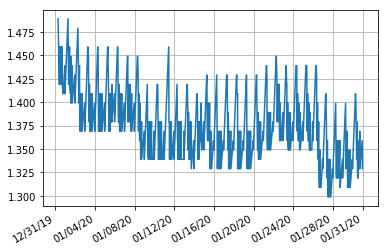

In [26]:
plot_over_time_1(merged_data)

In [27]:
def plot_over_time(data,gas_type='e5'):
    df1= data.sort_values('date', ascending=True)
    plt.plot(df1['date'], df1[gas_type],label=gas_type+"@"+df1['station_name'].values[0]+" "+df1['station_address'].values[0])
    plt.xticks(rotation='vertical')
    plt.legend(loc="lower left")
    

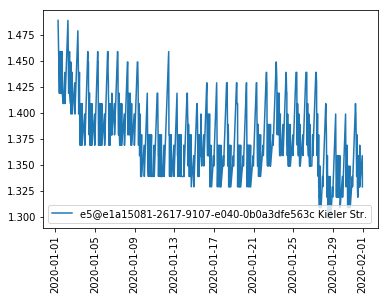

In [28]:
plot_over_time(merged_data)

Find time per day with the cheapest price:
 - 

In [29]:
gas_type='e5'

In [33]:
day1 = merged_data.loc[merged_data.date<'2020-01-02']

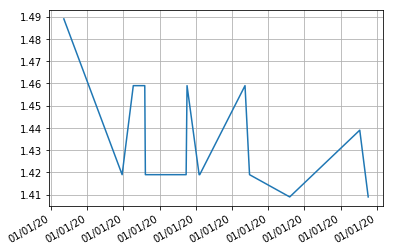

In [34]:
plot_over_time_1(day1)

In [35]:
day1.e5.mean()

1.4354285714285715

In [36]:
day1.e5.max()

1.489

In [37]:
day1.loc[day1.e5change==1].e5.mean()

1.4362727272727276

In [38]:
day1.e5.min()

1.409

In [39]:
day_1=day1.loc[day1.e5change==1]

In [40]:
day_1.date.loc[day_1.e5<=day_1.e5.min()]

262   2020-01-01 19:11:04+01:00
297   2020-01-01 23:31:04+01:00
Name: date, dtype: datetime64[ns, pytz.FixedOffset(60)]

In [41]:
day1.date.loc[day1.e5<=day1.e5.min()]

262   2020-01-01 19:11:04+01:00
297   2020-01-01 23:31:04+01:00
Name: date, dtype: datetime64[ns, pytz.FixedOffset(60)]

In [42]:
day1.loc[day1.e5<=day1.e5.min()]

,Unnamed: 0,date,station_uuid,diesel,e5,e10,dieselchange,e5change,e10change,station_name,station_address,station_latitude,station_longitude
262,180997,2020-01-01 19:11:04+01:00,e1a15081-2617-9107-e040-0b0a3dfe563c,1.269,1.409,1.389,0,1,1,e1a15081-2617-9107-e040-0b0a3dfe563c,Kieler Str.,53.58875,9.930771
297,207399,2020-01-01 23:31:04+01:00,e1a15081-2617-9107-e040-0b0a3dfe563c,1.269,1.409,1.389,1,1,1,e1a15081-2617-9107-e040-0b0a3dfe563c,Kieler Str.,53.58875,9.930771


In [43]:
day1.date.loc[day1.e5<=day1.e5.min()].values[0].hour

AttributeError: 'numpy.datetime64' object has no attribute 'hour'

In [44]:
#if not convert earlier
#datetime_object = datetime.strptime(day1.date.loc[day1.e5<=day1.e5.min()].values[1], '%Y-%m-%d %H:%M:%S+01')

In [45]:
datetime_object

datetime.datetime(2020, 1, 1, 4, 2, 3)

In [46]:
datetime_object.weekday()

2

In [47]:
today = datetime.strptime("2020-02-02 17:05:01+01", '%Y-%m-%d %H:%M:%S+01')

In [48]:
today.weekday()

6

In [49]:
def extract_hour(time_str):
    datetime_object=datetime.strptime(time_str, '%Y-%m-%d %H:%M:%S+01')
    return datetime_object.time().hour

In [50]:
datetime_object.time().hour

4

In [51]:
print(day_1.date.min(),day_1.date.max())

2020-01-01 06:43:03+01:00 2020-01-01 23:31:04+01:00


In [52]:
import calendar

def month_range(mon,year=2020):
    ndays = calendar.monthrange(year,mon)[1]    
    m_range=range(1,ndays+1)
    return m_range

In [53]:
calendar.month_abbr[1]

'Jan'

In [54]:
def get_lowprice_time(df,month=1,year=2020):
    time_lowest_price = []

    for i in month_range(month,year):
        dval = ""
        if i<10:
            dval = "0"+str(i+1)
        elif i>9:
            dval = str(i+1)
            #print(i)
        df0 = df.loc[(df.date>'2020-01-0'+str(i))&(df.date<'2020-01-'+dval)]
        
        #df = df0.loc[df0.e5change==1]
        tmp=""
        for j in df0.date.loc[df0.e5<=df0.e5.min()]:
            if not tmp:
                time_lowest_price.append(extract_hour(j)) 
            elif tmp:
                if extract_hour(tmp)!=extract_hour(j):
                    time_lowest_price.append(extract_hour(j))                
                    #print(j,", ",df0.e5)
            #elif extract_hour(tmp)==extract_hour(j):
                #print("repeat : ",j)
            tmp=j
    #print(", df0 = ",len(df0),"; change ",len(df))
    #time_lowest_price.append(df.date.loc[df.e5<=df.e5.min()])
    t_array = np.asarray(time_lowest_price)
    nbins=t_array.max()-t_array.min()
    plt.hist(t_array, bins=nbins,rwidth=0.9)
    plt.title('Time of the day when the gas price is lowest')
    plt.xlabel('Hour')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig("Plots/cheapest_hour_m"+calendar.month_abbr[month]+str(year)+".png", transparent=True)
    return t_array

In [55]:
t_array1=get_lowprice_time(merged_data.loc[merged_data.e5change==1])

TypeError: strptime() argument 1 must be str, not Timestamp

In [56]:
#t_array = np.asarray(time_lowest_price)
t_array=get_lowprice_time(merged_data)

TypeError: strptime() argument 1 must be str, not Timestamp

Prepare for training


In [57]:

spec_id = "e1a15081-2617-9107-e040-0b0a3dfe563c"



In [58]:
min_price_data = pd.DataFrame()
mip_data_dir = 'data/processed/total'
for filename in os.listdir(mip_data_dir):
    if "csv" in filename:
        print(filename)
        dataset=pd.read_csv(os.path.join(mip_data_dir, filename))
        #print("all ",len(dataset))
        dataset_spec = dataset.loc[dataset.station_uuid==spec_id]
        dataset_spec = dataset_spec.sort_values('date', ascending=True)
        dataset_spec = dataset_spec.loc[dataset_spec.e5<=dataset_spec.e5.min()][:1]
        #print("sel ",len(dataset_spec))
        min_price_data = min_price_data.append(dataset_spec)

min_price_data = min_price_data.sort_values('date', ascending=True)


2019-12-23-prices.csv
2019-12-14-prices.csv
2019-01-08-prices.csv
2019-04-17-prices.csv
2019-04-20-prices.csv
2019-05-14-prices.csv
2019-05-23-prices.csv
2019-09-09-prices.csv
2019-10-25-prices.csv
2019-10-12-prices.csv
2019-06-11-prices.csv
2019-06-26-prices.csv
2019-11-26-prices.csv
2019-11-11-prices.csv
2019-07-12-prices.csv
2019-07-25-prices.csv
2019-01-23-prices.csv
2019-08-16-prices.csv
2019-08-21-prices.csv
2019-01-14-prices.csv
2019-12-08-prices.csv
2019-09-15-prices.csv
2019-09-22-prices.csv
2019-05-08-prices.csv
2019-03-25-prices.csv
2020-01-17-prices.csv
2020-01-20-prices.csv
2019-03-12-prices.csv
2019-02-26-prices.csv
2019-02-11-prices.csv
2019-07-28-prices.csv
2019-10-28-prices.csv
2019-03-03-prices.csv
2020-01-31-prices.csv
2020-01-06-prices.csv
2019-05-19-prices.csv
2020-02-03-prices.csv
2019-09-04-prices.csv
2019-12-19-prices.csv
2019-08-30-prices.csv
2019-01-05-prices.csv
2019-08-07-prices.csv
2019-07-03-prices.csv
2019-03-28-prices.csv
2019-10-03-prices.csv
2019-09-18

2019-08-18-prices.csv
2019-12-31-prices.csv
2019-12-06-prices.csv
2019-02-28-prices.csv
2019-11-03-prices.csv
2019-06-03-prices.csv
2020-01-19-prices.csv
2019-09-07-prices.csv
2019-09-30-prices.csv
2019-01-31-prices.csv
2019-08-04-prices.csv
2019-01-06-prices.csv
2019-04-19-prices.csv
2019-11-28-prices.csv
2019-02-03-prices.csv
2019-06-28-prices.csv
2020-01-05-prices.csv


In [59]:
min_price_data.head()

,Unnamed: 0,date,station_uuid,diesel,e5,e10,dieselchange,e5change,e10change,station_name,station_address,station_latitude,station_longitude
87,69249,2019-01-01 11:55:06+01,e1a15081-2617-9107-e040-0b0a3dfe563c,1.199,1.339,1.319,0,1,1,HEM,Kieler Str.,53.58875,9.930771
319,191124,2019-01-02 19:55:13+01,e1a15081-2617-9107-e040-0b0a3dfe563c,1.169,1.299,1.279,0,1,1,HEM,Kieler Str.,53.58875,9.930771
275,194239,2019-01-03 19:58:06+01,e1a15081-2617-9107-e040-0b0a3dfe563c,1.149,1.299,1.279,1,1,1,HEM,Kieler Str.,53.58875,9.930771
290,190572,2019-01-04 19:58:06+01,e1a15081-2617-9107-e040-0b0a3dfe563c,1.149,1.299,1.289,1,1,0,HEM,Kieler Str.,53.58875,9.930771
203,181234,2019-01-05 19:55:06+01,e1a15081-2617-9107-e040-0b0a3dfe563c,1.139,1.289,1.269,1,1,1,HEM,Kieler Str.,53.58875,9.930771


In [61]:
len(min_price_data)

400

In [62]:
def prep_min_price(df):
    df = df[['date', 'e5']].copy()
    df.loc[:,'date']=pd.to_datetime(df['date'],utc=True).dt.date
    #df = df.set_index('date')
    df = df.reset_index(drop=True)
    return df

In [63]:
min_price_ready = prep_min_price(min_price_data)

In [64]:
len(min_price_ready)

400

In [70]:
min_price_ready.date.iloc[-1]

datetime.date(2020, 2, 4)

In [109]:
train = 0.9
i = int(train * len(min_price_ready))
price_train = min_price_ready[0: i]
price_test = min_price_ready[i:]

In [ ]:
ttt = min_price_ready.e5.values

In [ ]:
ttt=ttt.astype('float32')

In [103]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))

In [71]:
def gen_train(price_train,seq_len):
    input_train = []
    output_train = []
    for i in range(len(price_train) - seq_len):
        x = np.array(price_train.iloc[i: i + seq_len, 1])
        y = np.array([price_train.iloc[i + seq_len, 1]], np.float64)
        input_train.append(x)
        output_train.append(y)
    X_train = np.array(input_train)
    Y_train = np.array(output_train)
    return X_train, Y_train

In [80]:
xg,yg = gen_train(min_price_ready,10)

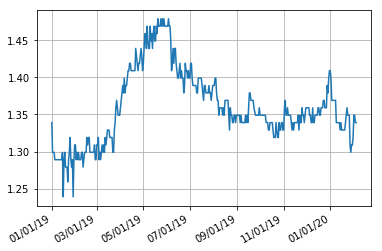

In [74]:
plot_over_time_1(min_price_ready)#,True,'e5_variation_over19-20')

In [ ]:
plt.plot(min_price_ready.e5)

In [75]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX) , np.array(dataY)

In [79]:
xc,yc = create_dataset(min_price_ready.e5.values,10)

In [122]:
x

390

In [123]:
y

10

In [97]:
x,y = xg.shape

In [100]:
xg_2 = xg.reshape((x, y, 1))

In [105]:
xg_1 = xg.reshape((x, y))

In [102]:
xg

array([[1.339, 1.299, 1.299, ..., 1.289, 1.289, 1.289],
       [1.299, 1.299, 1.299, ..., 1.289, 1.289, 1.289],
       [1.299, 1.299, 1.289, ..., 1.289, 1.289, 1.289],
       ...,
       [1.359, 1.349, 1.349, ..., 1.309, 1.319, 1.349],
       [1.349, 1.349, 1.349, ..., 1.319, 1.349, 1.349],
       [1.349, 1.349, 1.309, ..., 1.349, 1.349, 1.339]])

In [106]:
xg_1

array([[1.339, 1.299, 1.299, ..., 1.289, 1.289, 1.289],
       [1.299, 1.299, 1.299, ..., 1.289, 1.289, 1.289],
       [1.299, 1.299, 1.289, ..., 1.289, 1.289, 1.289],
       ...,
       [1.359, 1.349, 1.349, ..., 1.309, 1.319, 1.349],
       [1.349, 1.349, 1.349, ..., 1.319, 1.349, 1.349],
       [1.349, 1.349, 1.309, ..., 1.349, 1.349, 1.339]])

In [101]:
xg_2

array([[[1.339],
        [1.299],
        [1.299],
        ...,
        [1.289],
        [1.289],
        [1.289]],

       [[1.299],
        [1.299],
        [1.299],
        ...,
        [1.289],
        [1.289],
        [1.289]],

       [[1.299],
        [1.299],
        [1.289],
        ...,
        [1.289],
        [1.289],
        [1.289]],

       ...,

       [[1.359],
        [1.349],
        [1.349],
        ...,
        [1.309],
        [1.319],
        [1.349]],

       [[1.349],
        [1.349],
        [1.349],
        ...,
        [1.319],
        [1.349],
        [1.349]],

       [[1.349],
        [1.349],
        [1.309],
        ...,
        [1.349],
        [1.349],
        [1.339]]])

In [107]:
scaler.fit_transform(xg_1)

array([[0.41666667, 0.25      , 0.25      , ..., 0.20833333, 0.20833333,
        0.20833333],
       [0.25      , 0.25      , 0.25      , ..., 0.20833333, 0.20833333,
        0.20833333],
       [0.25      , 0.25      , 0.20833333, ..., 0.20833333, 0.20833333,
        0.20833333],
       ...,
       [0.5       , 0.45833333, 0.45833333, ..., 0.29166667, 0.33333333,
        0.45833333],
       [0.45833333, 0.45833333, 0.45833333, ..., 0.33333333, 0.45833333,
        0.45833333],
       [0.45833333, 0.45833333, 0.29166667, ..., 0.45833333, 0.45833333,
        0.41666667]])

In [115]:
look_back = 10
trainX, trainY = create_dataset(price_train.e5.values, look_back)
testX, testY = create_dataset(price_test.e5.values, look_back)

In [116]:
#trainX = scaler.fit_transform(trainX)
#trainY = scaler.fit_transform(trainY)
#testX = scaler.fit_transform(testX)
#testY = scaler.fit_transform(testY)



In [117]:
trainX

array([[1.339, 1.299, 1.299, ..., 1.289, 1.289, 1.289],
       [1.299, 1.299, 1.299, ..., 1.289, 1.289, 1.289],
       [1.299, 1.299, 1.289, ..., 1.289, 1.289, 1.289],
       ...,
       [1.349, 1.349, 1.349, ..., 1.359, 1.359, 1.359],
       [1.349, 1.349, 1.359, ..., 1.359, 1.359, 1.369],
       [1.349, 1.359, 1.359, ..., 1.359, 1.369, 1.369]])

In [127]:
trainY

array([1.289, 1.289, 1.289, 1.289, 1.299, 1.239, 1.289, 1.299, 1.279,
       1.279, 1.279, 1.259, 1.289, 1.299, 1.319, 1.289, 1.279, 1.289,
       1.239, 1.289, 1.309, 1.309, 1.289, 1.299, 1.289, 1.299, 1.289,
       1.289, 1.289, 1.299, 1.299, 1.279, 1.289, 1.299, 1.299, 1.299,
       1.319, 1.309, 1.319, 1.319, 1.299, 1.299, 1.299, 1.299, 1.299,
       1.299, 1.309, 1.289, 1.289, 1.309, 1.309, 1.319, 1.289, 1.299,
       1.289, 1.299, 1.309, 1.299, 1.309, 1.299, 1.319, 1.309, 1.319,
       1.329, 1.329, 1.329, 1.319, 1.319, 1.319, 1.319, 1.299, 1.299,
       1.329, 1.339, 1.359, 1.369, 1.359, 1.349, 1.349, 1.349, 1.359,
       1.369, 1.379, 1.389, 1.379, 1.399, 1.379, 1.389, 1.389, 1.399,
       1.409, 1.409, 1.419, 1.419, 1.409, 1.409, 1.409, 1.409, 1.409,
       1.409, 1.439, 1.429, 1.419, 1.409, 1.419, 1.419, 1.429, 1.439,
       1.429, 1.409, 1.419, 1.439, 1.459, 1.459, 1.439, 1.469, 1.449,
       1.439, 1.439, 1.469, 1.449, 1.459, 1.439, 1.459, 1.469, 1.449,
       1.449, 1.469,

In [124]:
trainX.shape[0]

349

In [118]:
# reshape input to be [samples, time steps, features]
trainX1 = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX1 = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [132]:
trainX1[0]

array([[1.339, 1.299, 1.299, 1.299, 1.289, 1.289, 1.289, 1.289, 1.289,
        1.289]])

In [128]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


Error when checking input: expected lstm_1_input to have 3 dimensions, but got array with shape (349, 10)

In [131]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX1, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 2s - loss: 0.5139
Epoch 2/100
 - 1s - loss: 0.0015
Epoch 3/100
 - 1s - loss: 9.4526e-04
Epoch 4/100
 - 1s - loss: 6.6916e-04
Epoch 5/100
 - 1s - loss: 5.9357e-04
Epoch 6/100
 - 1s - loss: 5.8804e-04
Epoch 7/100
 - 1s - loss: 5.4346e-04
Epoch 8/100
 - 1s - loss: 5.5300e-04
Epoch 9/100
 - 1s - loss: 5.2869e-04
Epoch 10/100
 - 1s - loss: 5.3405e-04
Epoch 11/100
 - 1s - loss: 5.1093e-04
Epoch 12/100
 - 1s - loss: 4.7433e-04
Epoch 13/100
 - 1s - loss: 4.5374e-04
Epoch 14/100
 - 1s - loss: 4.1572e-04
Epoch 15/100
 - 1s - loss: 3.8601e-04
Epoch 16/100
 - 1s - loss: 3.6332e-04
Epoch 17/100
 - 1s - loss: 3.5695e-04
Epoch 18/100
 - 1s - loss: 3.2292e-04
Epoch 19/100
 - 1s - loss: 3.5201e-04
Epoch 20/100
 - 1s - loss: 3.5567e-04
Epoch 21/100
 - 1s - loss: 3.0552e-04
Epoch 22/100
 - 1s - loss: 2.9521e-04
Epoch 23/100
 - 1s - loss: 2.7620e-04
Epoch 24/100
 - 1s - loss: 3.0061e-04
Epoch 25/100
 - 1s - loss: 2.9861e-04
Epoch 26/100
 - 1s - loss: 2.9732e-04
Epoch 27/100
 - 1s - loss: 2.

In [134]:
# make predictions
trainPredict = model.predict(trainX1)
testPredict = model.predict(testX1)

In [135]:
trainX0, trainY0 = create_dataset(price_train.e5.values, look_back)
testX0, testY0 = create_dataset(price_test.e5.values, look_back)

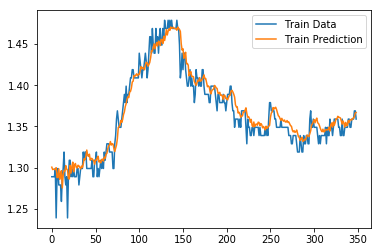

In [136]:
plt.plot(trainY0,label='Train Data')
plt.plot(trainPredict,label='Train Prediction')
plt.legend()
#plt.savefig("Plots/LSTM_training_2019.png", transparent=True)

In [ ]:
plt.plot(testY0,label='Test Data')
plt.plot(testPredict,label='Test Prediction')
plt.legend()
#plt.savefig("Plots/LSTM_test_2019.png", transparent=True)

In [141]:
score = model.evaluate(testX1, testY,verbose=0)
print(score*100)

0.042439959361217916


In [148]:
trainScore = model.evaluate(trainX1, trainY0, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX1, testY0, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00 MSE (0.01 RMSE)
Test Score: 0.00 MSE (0.02 RMSE)


In [149]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 4)                 240       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 245
Trainable params: 245
Non-trainable params: 0
_________________________________________________________________


In [153]:
from calendar import monthrange
month="01"
year="2020"
weekday, lastday = monthrange(int(year),int(month))

In [154]:
lastday

31